# Insurance Claim Fraud Detection :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Insurance_fraud_detection.csv')
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
# Giving name to the columns :
df.columns = ['months_as_customer', 'age', 'policy_number','policy_bind_date', 'policy_state', 'policy_csl','policy_deductable',
             'policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level', 'insured_occupation',
             'insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type',
             'incident_severity','authorities_contacted','incident_state','incident_city','1ncident_location','incident_hour_of_the_day',
             'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount',
             'injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Checking the dataset :

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       '1ncident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
# Droping unimportant columns :
unimportant_columns = ['policy_number', 'insured_zip','policy_csl']
df.drop(unimportant_columns , axis = 1 , inplace = True)

In [10]:
df['fraud_reported'].value_counts()

N    753
Y    246
Name: fraud_reported, dtype: int64

In [11]:
# First I will balance the dataset 
No_fraud = df[df['fraud_reported']=='N']
Yes_fraud = df[df['fraud_reported']=='Y']
sample = No_fraud.sample(300, random_state = 42)
df = pd.concat([sample, Yes_fraud])

In [12]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
953,246,39,19-04-2007,IN,1000,1416.08,0,FEMALE,JD,craft-repair,...,3,?,45180,5020,5020,35140,Honda,CRV,2004,N
869,260,43,03-06-2009,IN,500,982.22,0,FEMALE,JD,exec-managerial,...,0,?,75400,15080,7540,52780,Honda,CRV,2011,N
504,334,46,05-01-2013,IL,1000,876.88,6000000,MALE,MD,sales,...,1,NO,57330,12740,6370,38220,Jeep,Grand Cherokee,1998,N
106,118,28,28-12-1991,IN,2000,1207.36,0,FEMALE,High School,handlers-cleaners,...,0,?,74200,7420,14840,51940,Volkswagen,Passat,1997,N
295,231,43,17-06-2006,IL,2000,972.47,0,MALE,College,protective-serv,...,2,YES,77100,7710,15420,53970,Audi,A3,2010,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,234,41,16-05-1990,IN,500,951.56,0,FEMALE,JD,transport-moving,...,1,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y
976,266,42,06-03-2003,IN,500,1093.83,4000000,MALE,Associate,adm-clerical,...,1,NO,53280,4440,8880,39960,Suburu,Impreza,2015,Y
981,230,43,09-02-2007,IN,2000,1101.83,0,MALE,High School,exec-managerial,...,3,YES,51900,5190,10380,36330,BMW,M5,2011,Y
985,232,42,30-04-2013,IN,500,944.03,0,MALE,College,handlers-cleaners,...,3,?,77000,15400,7700,53900,Toyota,Highlander,2015,Y


# Working on Numerical columns :

<Axes: xlabel='fraud_reported', ylabel='months_as_customer'>

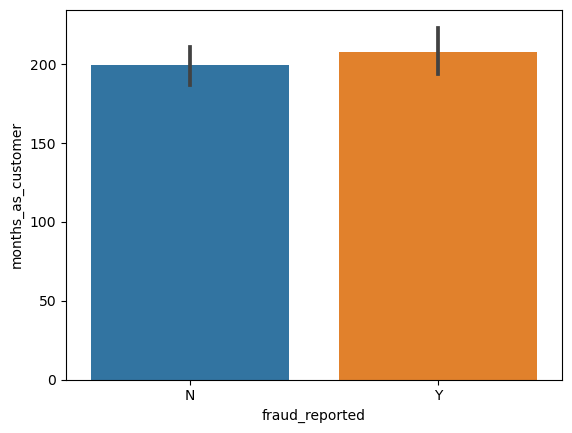

In [13]:
sns.barplot(data = df , x = 'fraud_reported', y = 'months_as_customer' )

<Axes: xlabel='fraud_reported', ylabel='age'>

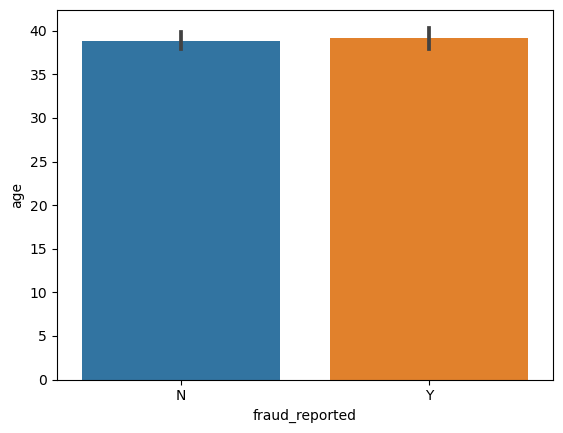

In [14]:
sns.barplot(data = df , x = 'fraud_reported', y = 'age' )

<Axes: xlabel='fraud_reported', ylabel='policy_deductable'>

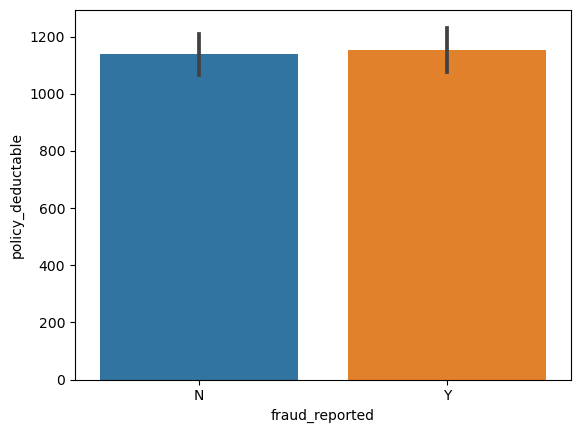

In [15]:
sns.barplot(data = df , x = 'fraud_reported', y = 'policy_deductable' )

<Axes: xlabel='fraud_reported', ylabel='policy_annual_premium'>

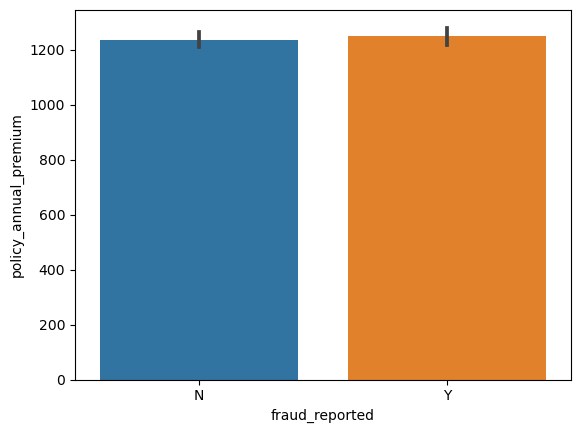

In [16]:
sns.barplot(data = df , x = 'fraud_reported', y = 'policy_annual_premium' )

<Axes: xlabel='fraud_reported', ylabel='umbrella_limit'>

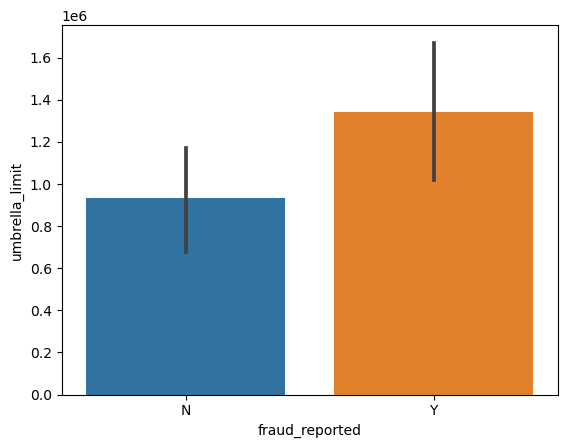

In [17]:
sns.barplot(data = df , x = 'fraud_reported', y = 'umbrella_limit' )

<Axes: xlabel='fraud_reported', ylabel='capital-gains'>

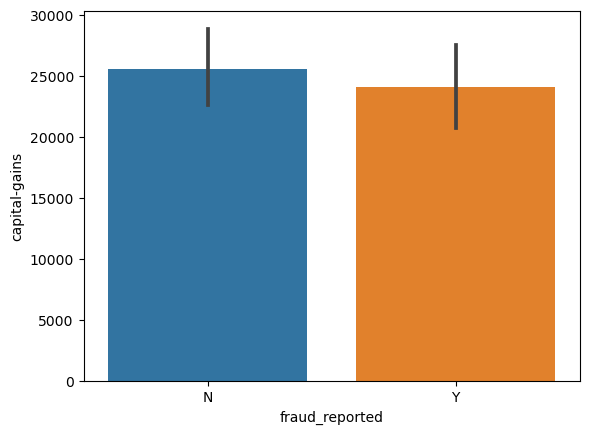

In [18]:
sns.barplot(data = df , x = 'fraud_reported', y = 'capital-gains' )

<Axes: xlabel='fraud_reported', ylabel='capital-loss'>

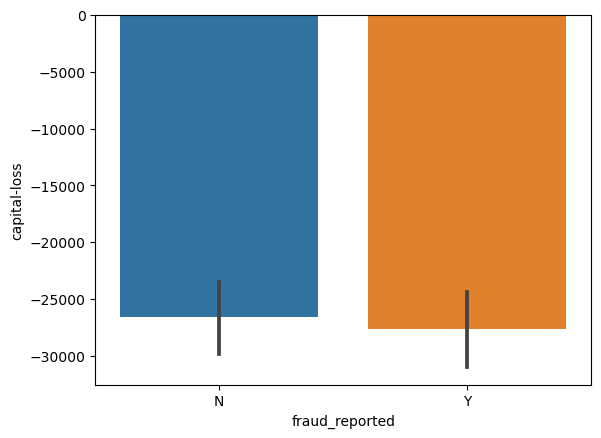

In [19]:
sns.barplot(data = df , x = 'fraud_reported', y = 'capital-loss' )

<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

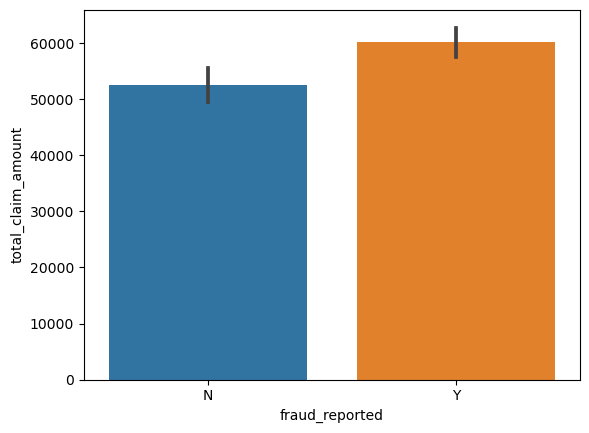

In [20]:
sns.barplot(data = df , x = 'fraud_reported', y = 'total_claim_amount' )

<Axes: xlabel='fraud_reported', ylabel='injury_claim'>

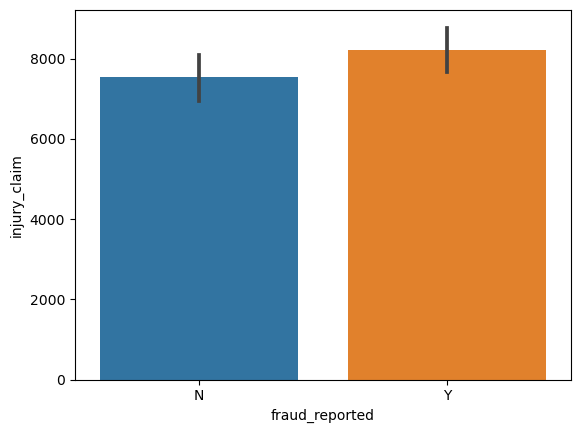

In [21]:
sns.barplot(data = df , x = 'fraud_reported', y = 'injury_claim' )

<Axes: xlabel='fraud_reported', ylabel='property_claim'>

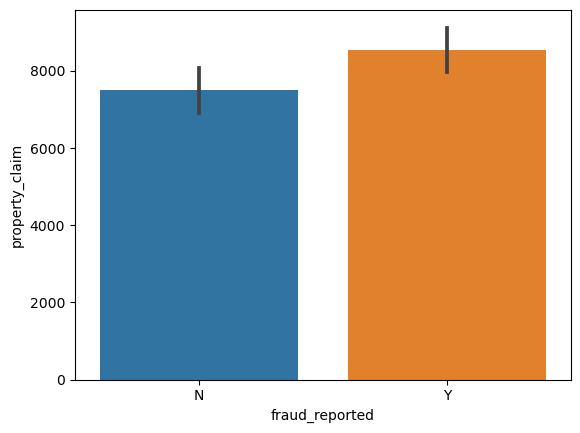

In [22]:
sns.barplot(data = df , x = 'fraud_reported', y = 'property_claim' )

<Axes: xlabel='fraud_reported', ylabel='vehicle_claim'>

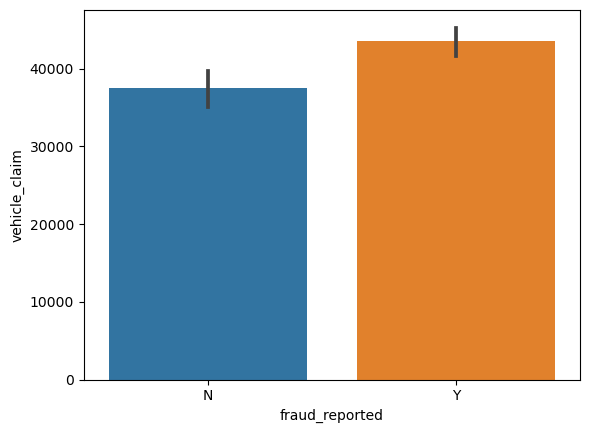

In [23]:
sns.barplot(data = df , x = 'fraud_reported', y = 'vehicle_claim' )

# Working on Categorical columns :

In [24]:
df.groupby('fraud_reported')['policy_state'].value_counts()

fraud_reported  policy_state
N               IL              105
                OH              103
                IN               92
Y               OH               90
                IN               79
                IL               77
Name: policy_state, dtype: int64

In [25]:
df.groupby('fraud_reported')['insured_occupation'].value_counts()

fraud_reported  insured_occupation
N               prof-specialty        31
                machine-op-inspct     29
                exec-managerial       28
                adm-clerical          25
                tech-support          24
                other-service         21
                priv-house-serv       21
                protective-serv       21
                craft-repair          20
                armed-forces          18
                sales                 18
                transport-moving      16
                farming-fishing       14
                handlers-cleaners     14
Y               exec-managerial       28
                machine-op-inspct     22
                tech-support          22
                craft-repair          21
                sales                 21
                transport-moving      21
                prof-specialty        18
                armed-forces          17
                farming-fishing       16
                protec

In [26]:
df.groupby('fraud_reported')['incident_type'].value_counts()

fraud_reported  incident_type           
N               Multi-vehicle Collision     123
                Single Vehicle Collision    116
                Parked Car                   36
                Vehicle Theft                25
Y               Single Vehicle Collision    116
                Multi-vehicle Collision     114
                Parked Car                    8
                Vehicle Theft                 8
Name: incident_type, dtype: int64

In [27]:
df.groupby('fraud_reported')['collision_type'].value_counts()

fraud_reported  collision_type 
N               Rear Collision     81
                Side Collision     80
                Front Collision    78
                ?                  61
Y               Rear Collision     91
                Front Collision    70
                Side Collision     69
                ?                  16
Name: collision_type, dtype: int64

In [28]:
df.groupby('fraud_reported')['incident_severity'].value_counts()

fraud_reported  incident_severity
N               Minor Damage         126
                Total Loss            95
                Major Damage          50
                Trivial Damage        29
Y               Major Damage         166
                Minor Damage          38
                Total Loss            36
                Trivial Damage         6
Name: incident_severity, dtype: int64

In [29]:
df.groupby('fraud_reported')['authorities_contacted'].value_counts()

fraud_reported  authorities_contacted
N               Police                   72
                Other                    65
                Fire                     64
                Ambulance                57
                None                     42
Y               Other                    63
                Fire                     60
                Police                   60
                Ambulance                57
                None                      6
Name: authorities_contacted, dtype: int64

In [30]:
df.groupby('fraud_reported')['number_of_vehicles_involved'].value_counts()

fraud_reported  number_of_vehicles_involved
N               1                              177
                3                              107
                2                                9
                4                                7
Y               1                              132
                3                               94
                4                               11
                2                                9
Name: number_of_vehicles_involved, dtype: int64

In [31]:
df.groupby('fraud_reported')['property_damage'].value_counts()

fraud_reported  property_damage
N               NO                 110
                ?                  106
                YES                 84
Y               ?                  103
                YES                 77
                NO                  66
Name: property_damage, dtype: int64

In [32]:
df.groupby('fraud_reported')['bodily_injuries'].value_counts()

fraud_reported  bodily_injuries
N               0                  108
                1                  100
                2                   92
Y               2                   90
                0                   80
                1                   76
Name: bodily_injuries, dtype: int64

In [33]:
df.groupby('fraud_reported')['witnesses'].value_counts()

fraud_reported  witnesses
N               1            81
                0            77
                3            73
                2            69
Y               2            73
                1            63
                3            60
                0            50
Name: witnesses, dtype: int64

In [34]:
df.groupby('fraud_reported')['police_report_available'].value_counts()

fraud_reported  police_report_available
N               NO                         107
                YES                         97
                ?                           96
Y               ?                           89
                NO                          86
                YES                         71
Name: police_report_available, dtype: int64

In [35]:
df.groupby('fraud_reported')['auto_make'].value_counts()

fraud_reported  auto_make 
N               Suburu        28
                Nissan        27
                Chevrolet     25
                Ford          25
                Saab          25
                Accura        23
                Volkswagen    22
                Jeep          21
                BMW           20
                Dodge         20
                Honda         17
                Mercedes      16
                Toyota        16
                Audi          15
Y               Ford          22
                Mercedes      22
                Audi          21
                Chevrolet     21
                BMW           20
                Dodge         20
                Suburu        19
                Volkswagen    19
                Saab          17
                Honda         14
                Nissan        14
                Accura        13
                Toyota        13
                Jeep          11
Name: auto_make, dtype: int64

In [36]:
df.groupby('fraud_reported')['auto_model'].value_counts()

fraud_reported  auto_model
N               Wrangler      15
                MDX           14
                Malibu        13
                Legacy        12
                Passat        12
                              ..
Y               Corolla        3
                Malibu         3
                Ultima         3
                3 Series       1
                RSX            1
Name: auto_model, Length: 78, dtype: int64

In [37]:
# 1.	months_as_customer: Number of months of patronage
# 2.	age: the length of time a customer has lived or a thing has existed
# 3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
# 4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
# 5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
# 6.	policy_csl: is basically Combined Single Limit
# 7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
# 8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
# 9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
# 10.	insured_zip: It is the zip code where the insurance was made
# 11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
# 12.	insured_education_level: This refers to the Level of education of the customer
# 13.	insured_occupation: This refers Occupation of the customer
# 14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
# 15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
# 16.	capital-gains: This refers to profit accrued due to insurance premium
# 17.	capital-loss: This refers to the losses incurred due to insurance claims
# 18.	incident_date: This refers to the date which claims where made by customers
# 19.	incident_type: This refers to the type of claim/vehicle damage made by customer
# 20.	collision_type: This refers to the area of damage on the vehicle
# 21.	incident_severity: This refers to the extent/level of damage
# 22.	authorities_contacted: This refers to the government agencies that were contacted after damage
# 23.	incident_state: This refers to the state at which the accident happened
# 24.	incident_city: This refers to the city at which the accident happened
# 25.	1ncident_location: This refers to the location at which the accident happened
# 26.	incident_hour_of_the_day: The period of the day which accident took place
# 27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
# 28.	property_damage: This refers to whether property was damaged or not
# 29.	bodily_injuries: This refers to injuries sustained
# 30.	witnesses: This refers to the number of witnesses involved
# 31.	police_report_available: This refers to whether the report on damage was documented or not
# 32.	total_claim_amount: This refers to the financial implications involved in claims
# 33.	injury_claim: This refers to physical injuries sustained
# 34.	property_claim: This refers to property damages during incident
# 35.	vehicle_claim: This refers to property damages during incident
# 36.	auto_make: This refers to the make of the vehicle
# 37.	auto_model: This refers to the model of the vehicle
# 38.	auto_year: This refers to the year which the vehicle was manufactured


In [38]:
# So , Analysing all the important columns and I will choose most important columns :

# Customer Information :
#     1. months_as_customer
#     2. policy_state
#     3. policy_annual_premium
#     4. capital-gains
#     5. capital-loss
    
# Incident_Information :
#     1. incident_type
#     2. incident_severity
#     3. authorities_contacted
#     4. police_report_available
#     5. witnesses
#     6. total_claim_amount
#     7.collision_type
    
# Vehicle information :
#     1. auto_make
#     2. auto_model
    
# Others :
#     1. insured_occupation
#     2. injury_claim
#     3. vehicle_claim
#     4. property_damage
#     5. bodily_injuries

In [39]:
Important_columns = ['months_as_customer', 'policy_state','policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
                    'incident_severity', 'authorities_contacted','police_report_available','witnesses','total_claim_amount',
                     'auto_make', 'auto_model', 'insured_occupation', 'injury_claim','vehicle_claim', 'property_damage', 'bodily_injuries','fraud_reported']
Modified_df = df[Important_columns]
Modified_df

,months_as_customer,policy_state,policy_annual_premium,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,police_report_available,witnesses,total_claim_amount,auto_make,auto_model,insured_occupation,injury_claim,vehicle_claim,property_damage,bodily_injuries,fraud_reported
953,246,IN,1416.08,0,-36600,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,?,3,45180,Honda,CRV,craft-repair,5020,35140,YES,0,N
869,260,IN,982.22,54500,-72100,Single Vehicle Collision,Front Collision,Total Loss,Fire,?,0,75400,Honda,CRV,exec-managerial,15080,52780,?,1,N
504,334,IL,876.88,0,0,Single Vehicle Collision,Rear Collision,Minor Damage,Police,NO,1,57330,Jeep,Grand Cherokee,sales,12740,38220,NO,2,N
106,118,IN,1207.36,0,-57000,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,?,0,74200,Volkswagen,Passat,handlers-cleaners,7420,51940,NO,1,N
295,231,IL,972.47,0,-58100,Multi-vehicle Collision,Front Collision,Minor Damage,Police,YES,2,77100,Audi,A3,protective-serv,7710,53970,YES,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,234,IN,951.56,59400,-78600,Multi-vehicle Collision,Side Collision,Major Damage,Police,?,1,98280,Chevrolet,Tahoe,transport-moving,15120,75600,NO,2,Y
976,266,IN,1093.83,0,-49600,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,NO,1,53280,Suburu,Impreza,adm-clerical,4440,39960,?,1,Y
981,230,IN,1101.83,28900,0,Multi-vehicle Collision,Front Collision,Minor Damage,Police,YES,3,51900,BMW,M5,exec-managerial,5190,36330,?,0,Y
985,232,IN,944.03,0,-58400,Single Vehicle Collision,Rear Collision,Minor Damage,Other,?,3,77000,Toyota,Highlander,handlers-cleaners,15400,53900,YES,2,Y


In [40]:
# Column transformation for fraud_reported
Modified_df['fraud_reported'] = Modified_df['fraud_reported'].map({'Y':1, 'N':0})
Modified_df

,months_as_customer,policy_state,policy_annual_premium,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,police_report_available,witnesses,total_claim_amount,auto_make,auto_model,insured_occupation,injury_claim,vehicle_claim,property_damage,bodily_injuries,fraud_reported
953,246,IN,1416.08,0,-36600,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,?,3,45180,Honda,CRV,craft-repair,5020,35140,YES,0,0
869,260,IN,982.22,54500,-72100,Single Vehicle Collision,Front Collision,Total Loss,Fire,?,0,75400,Honda,CRV,exec-managerial,15080,52780,?,1,0
504,334,IL,876.88,0,0,Single Vehicle Collision,Rear Collision,Minor Damage,Police,NO,1,57330,Jeep,Grand Cherokee,sales,12740,38220,NO,2,0
106,118,IN,1207.36,0,-57000,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,?,0,74200,Volkswagen,Passat,handlers-cleaners,7420,51940,NO,1,0
295,231,IL,972.47,0,-58100,Multi-vehicle Collision,Front Collision,Minor Damage,Police,YES,2,77100,Audi,A3,protective-serv,7710,53970,YES,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,234,IN,951.56,59400,-78600,Multi-vehicle Collision,Side Collision,Major Damage,Police,?,1,98280,Chevrolet,Tahoe,transport-moving,15120,75600,NO,2,1
976,266,IN,1093.83,0,-49600,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,NO,1,53280,Suburu,Impreza,adm-clerical,4440,39960,?,1,1
981,230,IN,1101.83,28900,0,Multi-vehicle Collision,Front Collision,Minor Damage,Police,YES,3,51900,BMW,M5,exec-managerial,5190,36330,?,0,1
985,232,IN,944.03,0,-58400,Single Vehicle Collision,Rear Collision,Minor Damage,Other,?,3,77000,Toyota,Highlander,handlers-cleaners,15400,53900,YES,2,1


# Spliting the data :

In [41]:
X = Modified_df.drop('fraud_reported', axis =  1)
y = Modified_df['fraud_reported']

In [42]:
X.shape

(546, 19)

In [43]:
X.head(5)

,months_as_customer,policy_state,policy_annual_premium,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,police_report_available,witnesses,total_claim_amount,auto_make,auto_model,insured_occupation,injury_claim,vehicle_claim,property_damage,bodily_injuries
953,246,IN,1416.08,0,-36600,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,?,3,45180,Honda,CRV,craft-repair,5020,35140,YES,0
869,260,IN,982.22,54500,-72100,Single Vehicle Collision,Front Collision,Total Loss,Fire,?,0,75400,Honda,CRV,exec-managerial,15080,52780,?,1
504,334,IL,876.88,0,0,Single Vehicle Collision,Rear Collision,Minor Damage,Police,NO,1,57330,Jeep,Grand Cherokee,sales,12740,38220,NO,2
106,118,IN,1207.36,0,-57000,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,?,0,74200,Volkswagen,Passat,handlers-cleaners,7420,51940,NO,1
295,231,IL,972.47,0,-58100,Multi-vehicle Collision,Front Collision,Minor Damage,Police,YES,2,77100,Audi,A3,protective-serv,7710,53970,YES,2


# Column Transformation :

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [45]:
ohe = OneHotEncoder(sparse = False)
preprocessor = ColumnTransformer(
transformers = [
    ('onehotencoder', ohe, [1,5,6,7,8,9,12,13,14,17])
],
remainder = 'passthrough'
)

In [48]:
from sklearn.model_selection import train_test_split , GridSearchCV

# Using Important models :

In [49]:
# I think tree algorithms will  be better for this dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

# Using DecisionTreeClassifier :

In [50]:
dt_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    dt = DecisionTreeClassifier(max_depth = 2)
    dt.fit(X_train_dummy , y_train)
    y_pred_dt = dt.predict(X_test_dummy)
    dt_score.append(accuracy_score(y_test , y_pred_dt))

In [51]:
print('best random state :' , np.argmax(dt_score))
print()
print('best score :', dt_score[np.argmax(dt_score)])

best random state : 25

best score : 0.8292682926829268


In [54]:
X_train_dt , X_test_dt , y_train_dt , y_test_dt = train_test_split(X,y,test_size = 0.3 , random_state =25)
X_train_dummy = preprocessor.fit_transform(X_train_dt)
X_test_dummy = preprocessor.transform(X_test_dt)

In [55]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth':[2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'splitter':['best', 'random'],
}
grid_search_dt = GridSearchCV(dt, param_grid , cv = 5)
grid_search_dt.fit(X_train_dummy , y_train_dt)
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_dt , y_pred_dt))
print()
print('best parameters :',grid_search_dt.best_params_)

accuracy score : 0.8292682926829268

best parameters : {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}


In [56]:
X_train_dt , X_test_dt , y_train_dt , y_test_dt = train_test_split(X,y,test_size = 0.3 , random_state =25)
X_train_dummy = preprocessor.fit_transform(X_train_dt)
X_test_dummy = preprocessor.transform(X_test_dt)
dt = DecisionTreeClassifier(max_depth = 2 , splitter = 'best', criterion = 'entropy')
dt.fit(X_train_dummy , y_train_dt)
y_pred_dt = dt.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_dt , y_pred_dt))
print()
print(confusion_matrix(y_test_dt , y_pred_dt))

accuracy score : 0.8292682926829268

[[81  8]
 [20 55]]


# Using RandomForestClassifier :

In [57]:
X_train_rf , X_test_rf , y_train_rf , y_test_rf = train_test_split(X,y,test_size = 0.3 , random_state = 42)
X_train_dummy = preprocessor.fit_transform(X_train_rf)
X_test_dummy = preprocessor.transform(X_test_rf)
rf = RandomForestClassifier(max_depth = 8, n_estimators = 500)
rf.fit(X_train_dummy , y_train_rf)
y_pred_rf = rf.predict(X_test_dummy)
print(accuracy_score(y_test_rf , y_pred_rf))

0.7804878048780488


In [58]:
rf = RandomForestClassifier()
param_grid = {
    'max_depth':[2,4,6,8],
    'n_estimators': [100,300,500],
    'criterion':['gini', 'entropy']
}
grid_search_rf = GridSearchCV(rf, param_grid , cv = 5)
grid_search_rf.fit(X_train_dummy , y_train_rf)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_rf , y_pred_rf))
print()
print('best parameters :',grid_search_rf.best_params_)

accuracy score : 0.7804878048780488

best parameters : {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 300}


In [59]:
rf_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    rf = RandomForestClassifier(max_depth = 4, n_estimators = 300,criterion = 'entropy')
    rf.fit(X_train_dummy , y_train)
    y_pred_rf = rf.predict(X_test_dummy)
    rf_score.append(accuracy_score(y_test , y_pred_rf))

In [60]:
print('best random state :' , np.argmax(rf_score))
print()
print('best score :', rf_score[np.argmax(rf_score)])

best random state : 25

best score : 0.8292682926829268


In [61]:
X_train_rf , X_test_rf , y_train_rf , y_test_rf = train_test_split(X,y,test_size = 0.3 , random_state =25)
X_train_dummy = preprocessor.fit_transform(X_train_rf)
X_test_dummy = preprocessor.transform(X_test_rf)
rf = RandomForestClassifier(max_depth = 4, n_estimators = 300,criterion = 'entropy')
rf.fit(X_train_dummy , y_train_rf)
y_pred_rf = rf.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_rf , y_pred_rf))
print()
print(confusion_matrix(y_test_rf , y_pred_rf))

accuracy score : 0.8292682926829268

[[81  8]
 [20 55]]


# Using GradientBoosting Classifier :

In [62]:
X_train_gb , X_test_gb , y_train_gb , y_test_gb = train_test_split(X,y,test_size = 0.3 , random_state = 42)
X_train_dummy = preprocessor.fit_transform(X_train_gb)
X_test_dummy = preprocessor.transform(X_test_gb)
gb = GradientBoostingClassifier( n_estimators = 500)
gb.fit(X_train_dummy , y_train_gb)
y_pred_gb = gb.predict(X_test_dummy)
print(accuracy_score(y_test_gb , y_pred_gb))

0.725609756097561


In [63]:
gb = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100,300,500],
    'criterion': ['friedman_mse', 'squared_error'],
    'learning_rate':[0.1, 0.01],
}
grid_search_gb = GridSearchCV(gb, param_grid , cv = 5)
grid_search_gb.fit(X_train_dummy , y_train_gb)
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_gb , y_pred_gb))
print()
print('best parameters :',grid_search_gb.best_params_)

accuracy score : 0.7804878048780488

best parameters : {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 100}


In [64]:
gb_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    gb = GradientBoostingClassifier(learning_rate = 0.01 , n_estimators = 100 ,criterion = 'friedman_mse')
    gb.fit(X_train_dummy , y_train)
    y_pred_gb = gb.predict(X_test_dummy)
    gb_score.append(accuracy_score(y_test , y_pred_gb))

In [65]:
print('best random state :' , np.argmax(gb_score))
print()
print('best score :', gb_score[np.argmax(gb_score)])

best random state : 81

best score : 0.823170731707317


In [66]:
X_train_gb , X_test_gb , y_train_gb , y_test_gb = train_test_split(X,y,test_size = 0.3 , random_state =81)
X_train_dummy = preprocessor.fit_transform(X_train_gb)
X_test_dummy = preprocessor.transform(X_test_gb)
gb = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 100,criterion = 'friedman_mse')
gb.fit(X_train_dummy , y_train_gb)
y_pred_gb = gb.predict(X_test_dummy)
print('accuracy score :', accuracy_score(y_test_gb , y_pred_gb))
print()
print(confusion_matrix(y_test_gb , y_pred_gb))

accuracy score : 0.823170731707317

[[76 12]
 [17 59]]


In [67]:
# So, I think I should go for GradientBoostingClassifier . Also ,
# in this model , the false positive value (  Actualy fraud but model saying not fraud) is least (17) . 

# predictive model :

In [68]:
def Is_Incurence_claim_fraud(months_as_customer,
                             policy_state,
                             policy_annual_premium,
                             capital_gains,
                             capital_loss,
                             incident_type,
                             collision_type,
                             incident_severity,
                             authorities_contacted,
                             police_report_available,
                             witnesses,
                             total_claim_amount,
                             auto_make,
                             auto_model,
                             insured_occupation,
                             injury_claim,
                             vehicle_claim,
                             property_damage,
                             bodily_injuries):
    features = np.array([[months_as_customer,	policy_state,	policy_annual_premium,	capital_gains,	capital_loss,	incident_type,	collision_type,	incident_severity,	authorities_contacted,	police_report_available,	witnesses,	total_claim_amount,	auto_make,	auto_model,	insured_occupation,	injury_claim,	vehicle_claim,	property_damage,	bodily_injuries]])
    transformed_features = preprocessor.transform(features)
    prediction = gb.predict(transformed_features).reshape(1, -1)[0]
    if prediction == 0:
       return "Insurence claim is 'Not Fraud' !"
    else:
       return "Insurence claim is 'Fraud' !"
    

In [69]:
months_as_customer = 134
policy_state = 'OH'
policy_annual_premium = 1413.14
capital_gains = 35100
capital_loss = 0
incident_type = 'Multi-vehicle Collision'
collision_type = 'Rear Collision'
incident_severity = 'Minor Damage'
authorities_contacted = 'Police'
police_report_available = 'NO'
witnesses = 3
total_claim_amount = 34650
auto_make = 'Dodge'
auto_model = 'RAM'
insured_occupation = 'sales'
injury_claim = 7700
vehicle_claim =  23100
property_damage= 'NO'
bodily_injuries =2

result = Is_Incurence_claim_fraud(months_as_customer,
                             policy_state,
                             policy_annual_premium,
                             capital_gains,
                             capital_loss,
                             incident_type,
                             collision_type,
                             incident_severity,
                             authorities_contacted,
                             police_report_available,
                             witnesses,
                             total_claim_amount,
                             auto_make,
                             auto_model,
                             insured_occupation,
                             injury_claim,
                             vehicle_claim,
                             property_damage,
                             bodily_injuries)
result

"Insurence claim is 'Not Fraud' !"